In [1]:
import sys
sys.path.insert(0,r"C:\DAYTODAY\New folder\Dropbox\B29\Devs\Python\packages\extras\packages")
sys.path.insert(0,r"C:\Users\Haro\Dropbox\B29\Devs\Python\packages\extras\packages")
import extras as ct
import pandas as pd

In [2]:
file = r'..\test_data\3.3.2.1.1.1 Assay_2023.csv'
assay = pd.read_csv(file)
print(assay.columns)

Index(['HOLEID', 'From', 'To', 'AI', 'RTYP', 'GEOCODE', 'GEOCODE2', 'LOI',
       'QTZ', 'CARB', 'TALC', 'CHL', 'AMPH', 'SiO', 'MgO', 'Fe2O3', 'CaO',
       'Al2O3', 'BaO', 'Cr2O3', 'K2O', 'MnO', 'Na2O', 'P2O5', 'SO3', 'SrO',
       'TiO2', 'GEB', 'H-b'],
      dtype='object')


In [3]:
vars = ['TALC']
catcol = 'GEOCODE2'
#cats = assay['GEOCODE2'].unique()
cats=['TALC','DOLO','VOLC','FAULT','CHL']

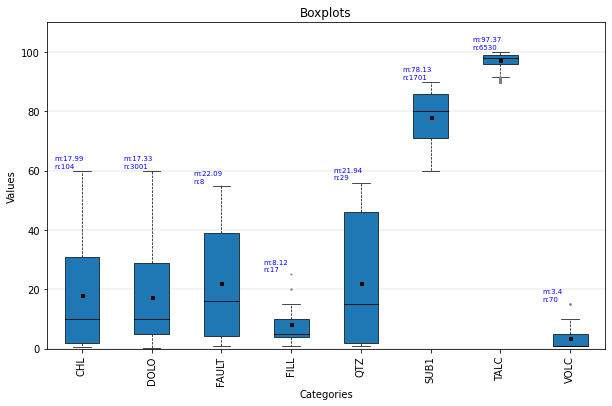

In [4]:
for var in vars:
    _ = ct.boxplot_by_category(
                        assay,
                        var,
                        catcol,
                        #cats=cats,
                        tmin=0,
                        markersize_mean=3,
                        markersize_flier=1,
                        widths=0.5,
                        ylim=(0,110),
                        figsize=(10,6),
                        stats=True,
                        use_all=False
                        )

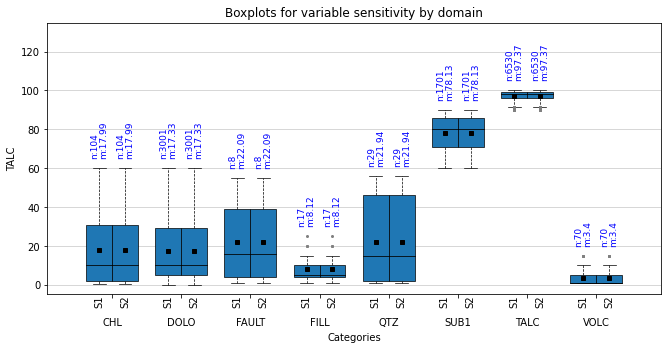

In [5]:
dfs = [assay,assay]
ct.boxplot_by_category_sensitivity(dfs,vars[0],catcol,figsize=(11,5))